In [34]:
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import math
import time
import re
import os
import seaborn as sns
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity  
from sklearn.metrics import pairwise_distances
from matplotlib import gridspec
from scipy.sparse import hstack
import plotly
import plotly.figure_factory as ff
from plotly.graph_objs import Scatter, Layout

plotly.offline.init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")

In [35]:
data=pd.read_json("C:\\Users\\hp\\Downloads\\ML-NLP\\ML-NLP\\Recommendation System\\tops_fashion.json")

In [36]:
data.head

<bound method NDFrame.head of          sku        asin product_type_name formatted_price author  \
0       None  B016I2TS4W             SHIRT            None   None   
1       None  B01N49AI08             SHIRT            None   None   
2       None  B01JDPCOHO             SHIRT            None   None   
3       None  B01N19U5H5             SHIRT            None   None   
4       None  B004GSI2OS             SHIRT          $26.26   None   
...      ...         ...               ...             ...    ...   
183133  None  B01MSALTSO         OUTERWEAR          $14.58   None   
183134  None  B015W98YQK             SHIRT            None   None   
183135  None  B075756PGC             SHIRT            None   None   
183136  None  B074L8FVTT             SHIRT          $44.99   None   
183137  None  B074FTYJQC             SHIRT            None   None   

                    color          brand      publisher  \
0                    None          FNC7C           None   
1                    No

In [37]:
data.shape[0]

183138

In [38]:
data.shape[1]


19

In [39]:
data.columns

Index(['sku', 'asin', 'product_type_name', 'formatted_price', 'author',
       'color', 'brand', 'publisher', 'availability', 'reviews',
       'large_image_url', 'availability_type', 'small_image_url',
       'editorial_review', 'title', 'model', 'medium_image_url',
       'manufacturer', 'editorial_reivew'],
      dtype='object')

In [40]:
data=data[['asin', 'brand', 'color', 'medium_image_url', 'product_type_name', 'title', 'formatted_price']]

In [41]:
data.head

<bound method NDFrame.head of               asin          brand              color  \
0       B016I2TS4W          FNC7C               None   
1       B01N49AI08   FIG Clothing               None   
2       B01JDPCOHO   FIG Clothing               None   
3       B01N19U5H5        Focal18               None   
4       B004GSI2OS    FeatherLite  Onyx Black/ Stone   
...            ...            ...                ...   
183133  B01MSALTSO      TOOGOO(R)              Black   
183134  B015W98YQK     VOGUE CODE   Monochrome Plaid   
183135  B075756PGC       Wrangler               Pink   
183136  B074L8FVTT  susana monaco               Rose   
183137  B074FTYJQC       Sexybaby               None   

                                         medium_image_url product_type_name  \
0       https://images-na.ssl-images-amazon.com/images...             SHIRT   
1       https://images-na.ssl-images-amazon.com/images...             SHIRT   
2       https://images-na.ssl-images-amazon.com/images...   

In [42]:
print(data["color"].describe())

count     64956
unique     7380
top       Black
freq      13207
Name: color, dtype: object


In [43]:
print(data["brand"].describe())

count     182987
unique     10577
top         Zago
freq         223
Name: brand, dtype: object


In [44]:
print(data["product_type_name"].describe())

count     183138
unique        72
top        SHIRT
freq      167794
Name: product_type_name, dtype: object


In [45]:
print(data["title"].describe())

count                                                183138
unique                                               175985
top       Nakoda Cotton Self Print Straight Kurti For Women
freq                                                     77
Name: title, dtype: object


In [46]:
count=Counter(data["product_type_name"])
count.most_common(10)

[('SHIRT', 167794),
 ('APPAREL', 3549),
 ('BOOKS_1973_AND_LATER', 3336),
 ('DRESS', 1584),
 ('SPORTING_GOODS', 1281),
 ('SWEATER', 837),
 ('OUTERWEAR', 796),
 ('OUTDOOR_RECREATION_PRODUCT', 729),
 ('ACCESSORY', 636),
 ('UNDERWEAR', 425)]

In [47]:
data=data.loc[~data["color"].isnull()]

In [48]:
data=data.loc[~data["formatted_price"].isnull()]

In [49]:
data.shape[0]

28385

In [50]:
data_sorted=data[data["title"].apply(lambda x:len(x.split())>4)]

In [51]:
data_sorted.shape[0]

27949

In [52]:
data_sorted.sort_values('title', inplace = True, ascending = False)

In [53]:
data_sorted.head

<bound method NDFrame.head of               asin                  brand                 color  \
61973   B06Y1KZ2WB                 Éclair            Black/Pink   
133820  B010RV33VE               xiaoming                  Pink   
81461   B01DDSDLNS               xiaoming                 White   
75995   B00X5LYO9Y               xiaoming           Red Anchors   
151570  B00WPJG35K               xiaoming                 White   
...            ...                    ...                   ...   
12050   B06WRW8RQ1                     AJ                 Black   
40451   B073SKNQHD   The Workout Princess  Premium Heather Gray   
109599  B00KI3VDXM            Crazy4Bling                Purple   
78827   B003IDE8XQ      Maggie's Organics                  Grey   
118987  B008D30AGK  Out+of+Print+Clothing          Multicolored   

                                         medium_image_url product_type_name  \
61973   https://images-na.ssl-images-amazon.com/images...             SHIRT   
133820 

In [54]:
indices = []
for i,row in data_sorted.iterrows():
    indices.append(i)

indices

[61973,
 133820,
 81461,
 75995,
 151570,
 152506,
 76209,
 103647,
 138588,
 95954,
 74338,
 18905,
 60078,
 59030,
 177229,
 22273,
 135865,
 171318,
 44082,
 40331,
 60603,
 56982,
 39370,
 120006,
 8424,
 139484,
 94413,
 167267,
 92382,
 93518,
 101522,
 74087,
 51286,
 35796,
 73818,
 127730,
 37902,
 164994,
 125784,
 129103,
 161966,
 151598,
 100567,
 102610,
 80880,
 74066,
 167810,
 100898,
 86604,
 153020,
 168828,
 97684,
 83173,
 37290,
 17234,
 130798,
 128762,
 38107,
 32240,
 141241,
 37911,
 142996,
 115660,
 163170,
 73633,
 132135,
 42468,
 69292,
 32217,
 169883,
 108966,
 68893,
 115422,
 141090,
 80785,
 92051,
 165541,
 150090,
 163741,
 123456,
 57588,
 116686,
 170034,
 160212,
 144984,
 142244,
 141432,
 118353,
 101884,
 110314,
 140321,
 76493,
 135579,
 85390,
 78409,
 158069,
 148089,
 100597,
 140457,
 137999,
 147641,
 94653,
 120825,
 145597,
 114795,
 98140,
 148772,
 80202,
 113184,
 79120,
 93161,
 86422,
 103918,
 157939,
 99504,
 85577,
 133860,
 

In [55]:
import itertools
stage1_dedupe_asins = []
i = 0
j = 0
num_data_points = data_sorted.shape[0]
while i < num_data_points and j < num_data_points:
    previous_i = i
    
    a = data['title'].loc[indices[i]].split()
    
    j = i+1
    
    while j< num_data_points:
        
        b = data['title'].loc[indices[j]].split()
        
        length = max(len(a), len(b))
        
        count = 0;
        
        for k in itertools.zip_longest(a,b):
            if(k[0] == k[1]):
                count+=1
        
        if ( length-count) > 2:
            
            stage1_dedupe_asins.append(data_sorted['asin'].loc[indices[i]])
        
            if j == num_data_points-1:
                stage1_dedupe_asins.append(data_sorted['asin'].loc[indices[j]])
                
            i = j
            break
            
        else:
            j += 1
        
    if previous_i == i:
        break
        

In [56]:
data = data.loc[data['asin'].isin(stage1_dedupe_asins)]

In [57]:
data.shape[0]

17593

In [59]:
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
print("list of stop words : ", stop_words)

def nlp_preprocessing(total_text , index, column):
    if type(total_text) is not int:
        string = ""
        for words in total_text.split():
            word = ("".join(e for e in words if e.isalnum()))
            word = word.lower()
            
            if not word in stop_words:
                string += word + " "
            
        data[column][index] = string

list of stop words :  {'yours', 'below', 'no', 're', 'y', 'will', 'have', 'him', 'was', 'from', "mightn't", 'by', 'whom', 'does', 'shouldn', 'couldn', 'hers', 'once', 'an', 'above', 'before', 'be', 'herself', 'ma', 'their', 'didn', 've', 'each', 't', 'ourselves', 'wasn', 'they', 'for', 'up', "mustn't", 'himself', 's', 'aren', 'we', 'over', "didn't", 'in', 'can', 'all', 'here', 'just', 'themselves', 'most', 'because', 'his', 'again', 'me', 'through', "should've", 'its', 'there', 'of', 'off', 'm', 'more', 'don', 'she', 'these', 'them', 'ours', 'has', 'll', 'now', "aren't", 'than', "that'll", 'yourselves', 'do', 'hasn', "shouldn't", 'any', 'such', 'it', 'that', 'isn', 'nor', 'o', 'where', 'wouldn', 'itself', 'a', 'myself', 'weren', 'same', 'if', 'should', "shan't", 'own', 'being', 'needn', "needn't", "won't", 'had', 'hadn', 'when', 'yourself', 'haven', 'into', "haven't", 'under', 'very', "hadn't", "you'll", 'down', "doesn't", 'too', 'as', 'what', 'some', "you'd", 'then', 'and', 'both', 's

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [60]:
for index, row in data.iterrows():
    nlp_preprocessing(row['title'], index, 'title')

In [61]:
data.head

<bound method NDFrame.head of               asin                        brand              color  \
4       B004GSI2OS                  FeatherLite  Onyx Black/ Stone   
6       B012YX2ZPI  HX-Kingdom Fashion T-shirts              White   
15      B003BSRPB0                  FeatherLite              White   
27      B014ICEJ1Q                        FNC7C             Purple   
43      B0079BMKDS                  FeatherLite              White   
...            ...                          ...                ...   
183081  B01MRV2IFS                      YueLian              Black   
183092  B01LY4QWLF              Vintage America              White   
183096  B07167SCNH             Tart Collections              Black   
183101  B07575N2WX                      Soprano               Gray   
183120  B01NCO06S0                  Faded Glory          Blue/Grey   

                                         medium_image_url product_type_name  \
4       https://images-na.ssl-images-amazon.com/im

In [62]:
def display_img(url, ax, fig):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    plt.imshow(img)
    
#plotting code to understand the algo's decision
def plot_heatmap(keys, values, labels, url, text):
        # keys: list of words of recommended title
        # values: len(values) ==  len(keys), values(i) represents the occurence of the word keys(i)
        # labels: len(labels) == len(keys), the values of labels depends on the model we are using
                # if model == 'bag of words': labels(i) = values(i)
                # if model == 'tfidf weighted bag of words':labels(i) = tfidf(keys(i))
                # if model == 'idf weighted bag of words':labels(i) = idf(keys(i))
        # url : apparel's url

        # we will devide the whole figure into two parts
        gs = gridspec.GridSpec(2, 2, width_ratios=[4,1], height_ratios=[4,1]) 
        fig = plt.figure(figsize=(25,3))
        
        # 1st, ploting heat map that represents the count of commonly ocurred words in title2
        ax = plt.subplot(gs[0])
        # it displays a cell in white color if the word is intersection(lis of words of title1 and list of words of title2), in black if not
        ax = sns.heatmap(np.array([values]), annot=np.array([labels]))
        ax.set_xticklabels(keys) # set that axis labels as the words of title
        ax.set_title(text) # apparel title
        
        # 2nd, plotting image of the the apparel
        ax = plt.subplot(gs[1])
        # we don't want any grid lines for image and no labels on x-axis and y-axis
        ax.grid(False)
        ax.set_xticks([])
        ax.set_yticks([])
        
        # we call dispaly_img based with paramete url
        display_img(url, ax, fig)
        
        # displays combine figure ( heat map and image together)
        plt.show()

def plot_heatmap_image(doc_id, vec1, vec2, url, text, model):

    # doc_id : index of the title1
    # vec1 : input apparels's vector, it is of a dict type {word:count}
    # vec2 : recommended apparels's vector, it is of a dict type {word:count}
    # url : apparels image url
    # text: title of recomonded apparel (used to keep title of image)
    # model, it can be any of the models, 
        # 1. bag_of_words
        # 2. tfidf
        # 3. idf

    # we find the common words in both titles, because these only words contribute to the distance between two title vec's
    intersection = set(vec1.keys()) & set(vec2.keys()) 

    # we set the values of non intersecting words to zero, this is just to show the difference in heatmap
    for i in vec2:
        if i not in intersection:
            vec2[i]=0

    # for labeling heatmap, keys contains list of all words in title2
    keys = list(vec2.keys())
    #  if ith word in intersection(lis of words of title1 and list of words of title2): values(i)=count of that word in title2 else values(i)=0 
    values = [vec2[x] for x in vec2.keys()]
    
    # labels: len(labels) == len(keys), the values of labels depends on the model we are using
        # if model == 'bag of words': labels(i) = values(i)
        # if model == 'tfidf weighted bag of words':labels(i) = tfidf(keys(i))
        # if model == 'idf weighted bag of words':labels(i) = idf(keys(i))

    if model == 'bag_of_words':
        labels = values
    elif model == 'tfidf':
        labels = []
        for x in vec2.keys():
            # tfidf_title_vectorizer.vocabulary_ it contains all the words in the corpus
            # tfidf_title_features[doc_id, index_of_word_in_corpus] will give the tfidf value of word in given document (doc_id)
            if x in  tfidf_title_vectorizer.vocabulary_:
                labels.append(tfidf_title_features[doc_id, tfidf_title_vectorizer.vocabulary_[x]])
            else:
                labels.append(0)
    elif model == 'idf':
        labels = []
        for x in vec2.keys():
            # idf_title_vectorizer.vocabulary_ it contains all the words in the corpus
            # idf_title_features[doc_id, index_of_word_in_corpus] will give the idf value of word in given document (doc_id)
            if x in  idf_title_vectorizer.vocabulary_:
                labels.append(idf_title_features[doc_id, idf_title_vectorizer.vocabulary_[x]])
            else:
                labels.append(0)

    plot_heatmap(keys, values, labels, url, text)


# this function gets a list of wrods along with the frequency of each 
# word given "text"
def text_to_vector(text):
    word = re.compile(r'\w+')
    words = word.findall(text)
    # words stores list of all words in given string, you can try 'words = text.split()' this will also gives same result
    return Counter(words) # Counter counts the occurence of each word in list, it returns dict type object {word1:count}



def get_result(doc_id, content_a, content_b, url, model):
    text1 = content_a
    text2 = content_b
    
    # vector1 = dict{word11:#count, word12:#count, etc.}
    vector1 = text_to_vector(text1)

    # vector1 = dict{word21:#count, word22:#count, etc.}
    vector2 = text_to_vector(text2)

    plot_heatmap_image(doc_id, vector1, vector2, url, text2, model)


In [63]:
from sklearn.feature_extraction.text import CountVectorizer
title_vectorizer = CountVectorizer()
title_features = title_vectorizer.fit_transform(data['title'])
title_features.shape

(17593, 12927)

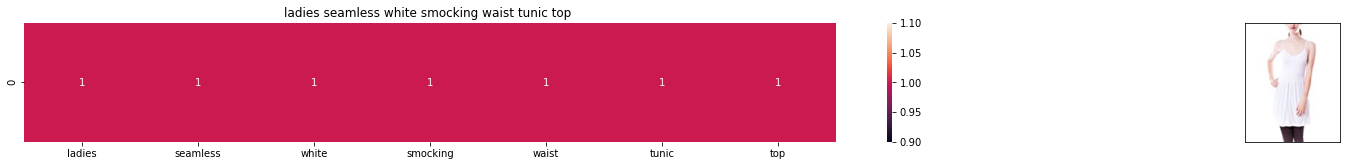

ASIN : B004VT7N24
Brand: FineBrandShop
Title: ladies seamless white smocking waist tunic top 
Euclidean similarity with the query image : 0.0


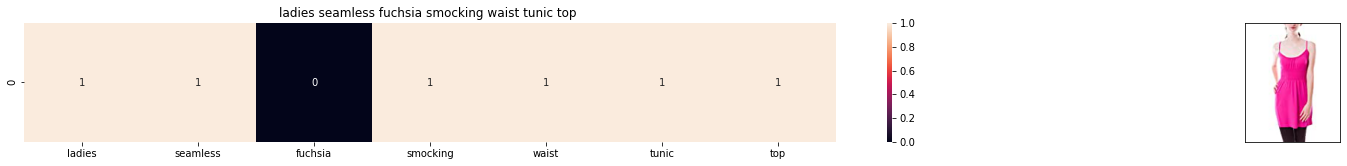

ASIN : B004VT7M8O
Brand: FineBrandShop
Title: ladies seamless fuchsia smocking waist tunic top 
Euclidean similarity with the query image : 1.4142135623730951


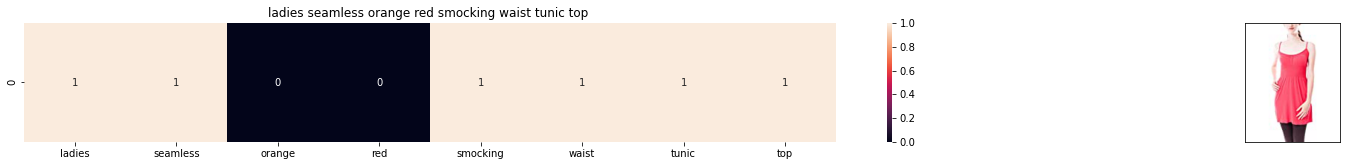

ASIN : B004VT7MU2
Brand: FineBrandShop
Title: ladies seamless orange red smocking waist tunic top 
Euclidean similarity with the query image : 1.7320508075688772


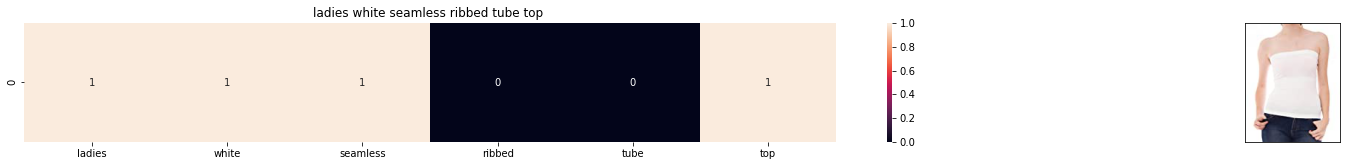

ASIN : B009286M6W
Brand: FineBrandShop
Title: ladies white seamless ribbed tube top 
Euclidean similarity with the query image : 2.23606797749979


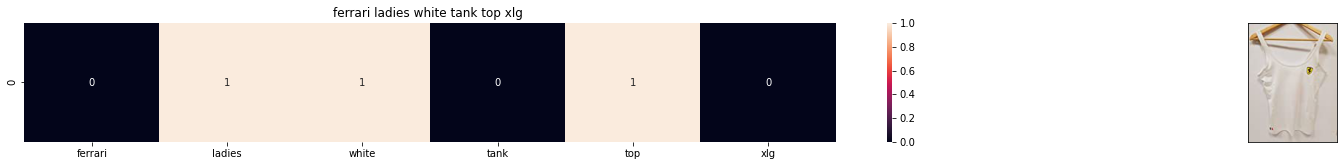

ASIN : B001HWXGYC
Brand: Ferrari
Title: ferrari ladies white tank top xlg 
Euclidean similarity with the query image : 2.6457513110645907


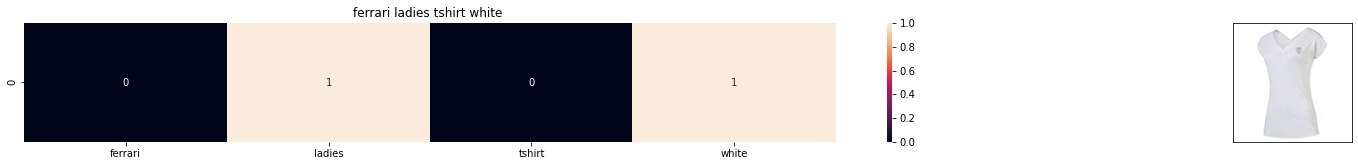

ASIN : B015YKMU80
Brand: PUMA
Title: ferrari ladies tshirt white 
Euclidean similarity with the query image : 2.6457513110645907


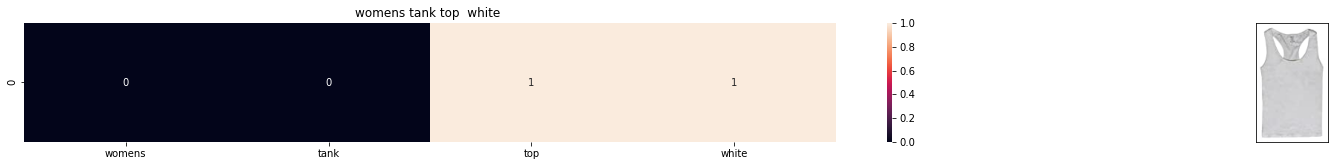

ASIN : B00JPOZ9GM
Brand: Sofra
Title: womens tank top  white 
Euclidean similarity with the query image : 2.6457513110645907


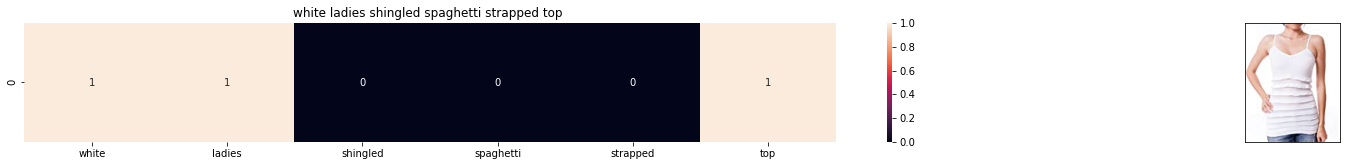

ASIN : B007G0XTGE
Brand: FineBrandShop
Title: white ladies shingled spaghetti strapped top 
Euclidean similarity with the query image : 2.6457513110645907


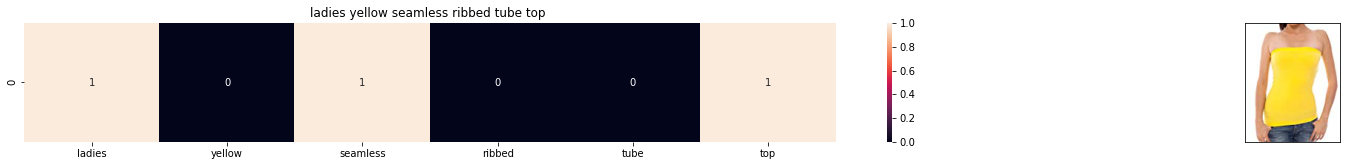

ASIN : B009286MFS
Brand: FineBrandShop
Title: ladies yellow seamless ribbed tube top 
Euclidean similarity with the query image : 2.6457513110645907


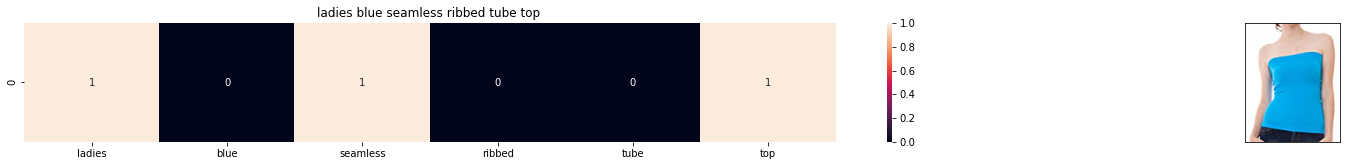

ASIN : B009286L36
Brand: FineBrandShop
Title: ladies blue seamless ribbed tube top 
Euclidean similarity with the query image : 2.6457513110645907


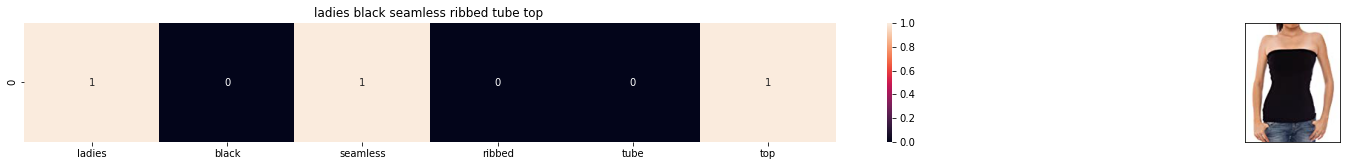

ASIN : B009286KVO
Brand: FineBrandShop
Title: ladies black seamless ribbed tube top 
Euclidean similarity with the query image : 2.6457513110645907


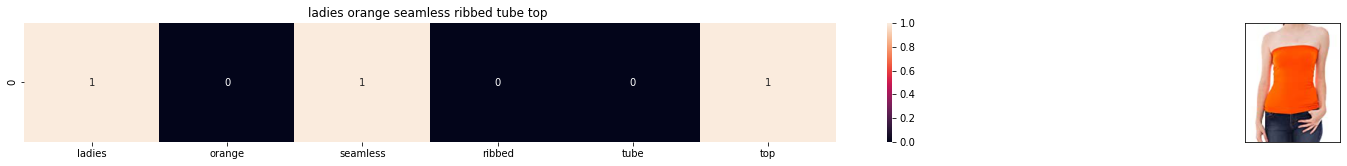

ASIN : B009286LW2
Brand: FineBrandShop
Title: ladies orange seamless ribbed tube top 
Euclidean similarity with the query image : 2.6457513110645907


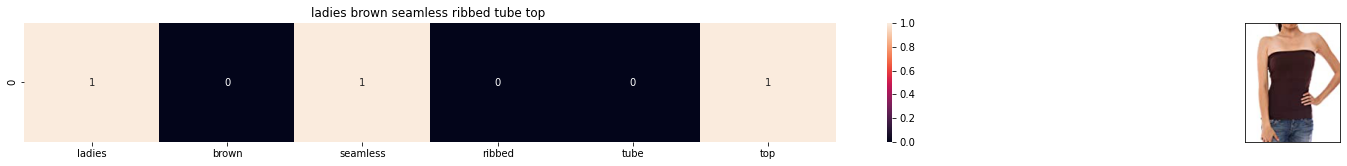

ASIN : B009286LBS
Brand: FineBrandShop
Title: ladies brown seamless ribbed tube top 
Euclidean similarity with the query image : 2.6457513110645907


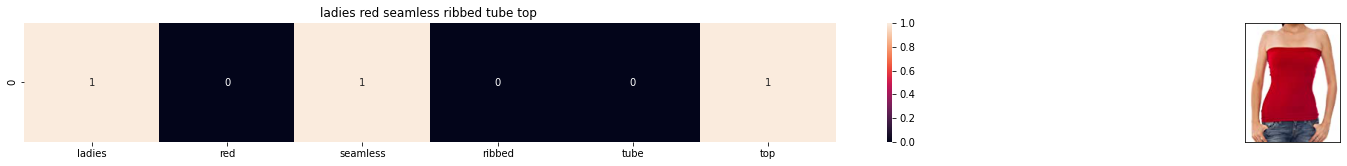

ASIN : B009286M3A
Brand: FineBrandShop
Title: ladies red seamless ribbed tube top 
Euclidean similarity with the query image : 2.6457513110645907


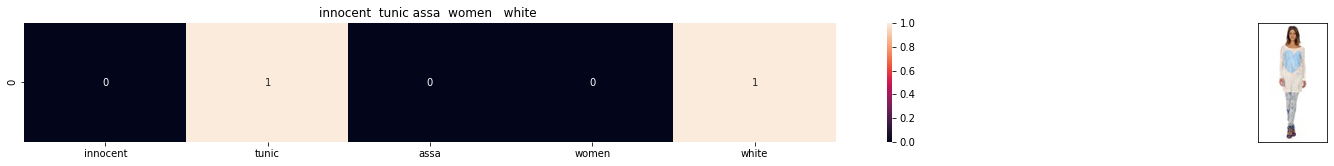

ASIN : B01HMPG63A
Brand: Innocent
Title: innocent  tunic assa  women   white 
Euclidean similarity with the query image : 2.8284271247461903


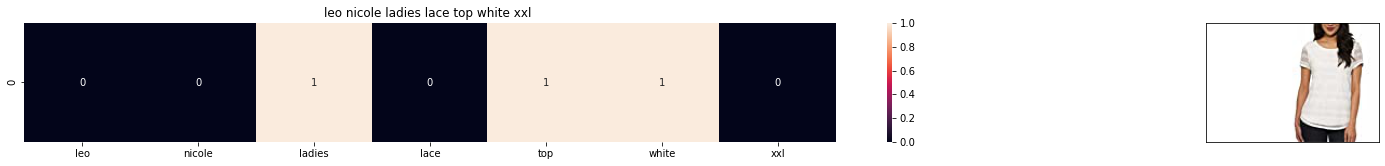

ASIN : B0716JYS16
Brand: Leo & Nicole
Title: leo nicole ladies lace top white xxl 
Euclidean similarity with the query image : 2.8284271247461903


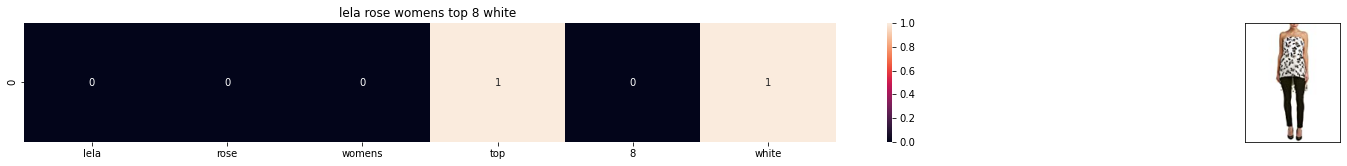

ASIN : B06XCXWKTP
Brand: Lela Rose
Title: lela rose womens top 8 white 
Euclidean similarity with the query image : 2.8284271247461903


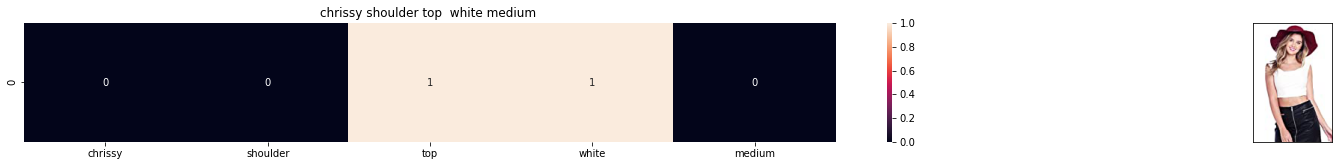

ASIN : B01IAZ4T7G
Brand: Lushfox
Title: chrissy shoulder top  white medium 
Euclidean similarity with the query image : 2.8284271247461903


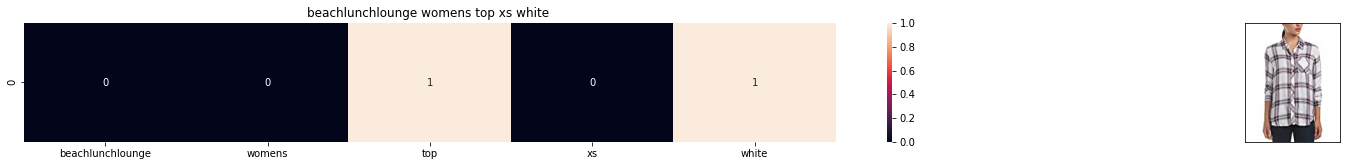

ASIN : B0753KYMLQ
Brand: Beach Lunch Lounge
Title: beachlunchlounge womens top xs white 
Euclidean similarity with the query image : 2.8284271247461903


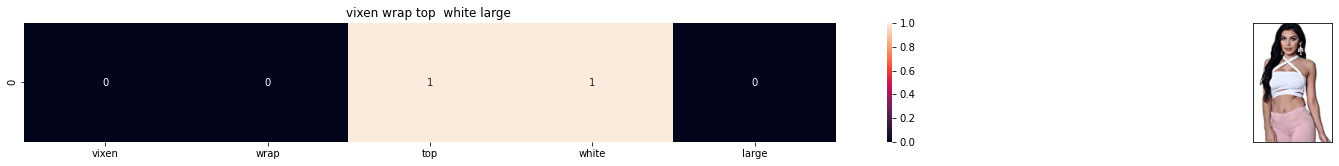

ASIN : B01G2WULQ2
Brand: Lushfox
Title: vixen wrap top  white large 
Euclidean similarity with the query image : 2.8284271247461903


In [64]:
def bag_of_words_model(doc_id, num_results):
    
    pairwise_dist = pairwise_distances(title_features, title_features[doc_id])
    
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    
    pdists = np.sort(pairwise_dist.flatten())[0:num_results]
    
    df_indices = list(data.index[indices])
    
    for i in range(0,len(indices)):
        # we will pass 1. doc_id, 2. title1, 3. title2, url, model
        get_result(indices[i],data['title'].loc[df_indices[0]], data['title'].loc[df_indices[i]], data['medium_image_url'].loc[df_indices[i]], 'bag_of_words')
        print('ASIN :',data['asin'].loc[df_indices[i]])
        print ('Brand:', data['brand'].loc[df_indices[i]])
        print ('Title:', data['title'].loc[df_indices[i]])
        print ('Euclidean similarity with the query image :', pdists[i])
        print('='*60)

        
        
bag_of_words_model(125, 20)
    
    

In [65]:
tfidf_title_vectorizer = TfidfVectorizer(min_df = 0)
tfidf_title_features = tfidf_title_vectorizer.fit_transform(data['title'])

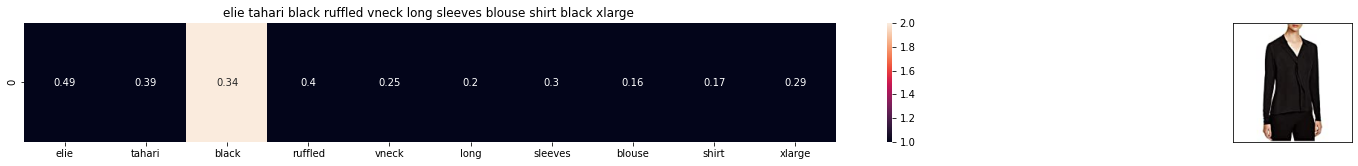

ASIN : B0728DT431
BRAND : Elie Tahari
Eucliden distance from the given image : 0.0


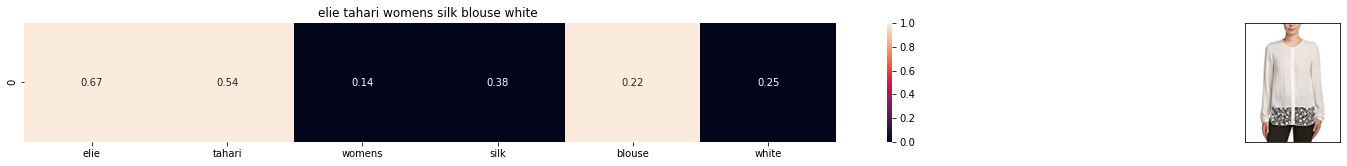

ASIN : B0758ZBV4G
BRAND : Elie Tahari
Eucliden distance from the given image : 0.930818338718771


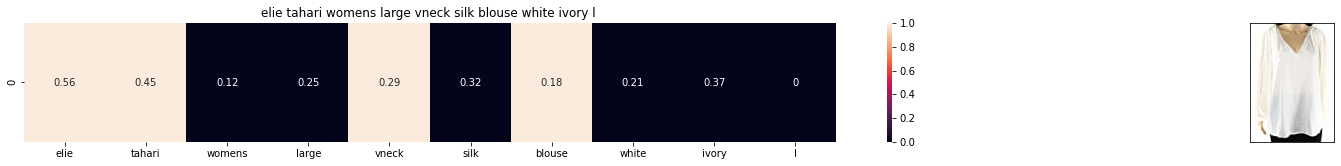

ASIN : B0758L371D
BRAND : Elie Tahari
Eucliden distance from the given image : 0.946967152190245


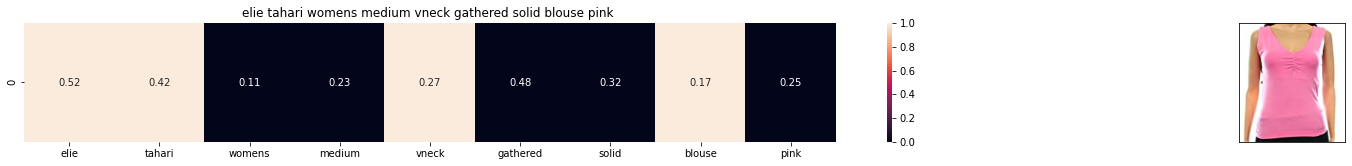

ASIN : B072VH8MKT
BRAND : Elie Tahari
Eucliden distance from the given image : 0.9917066516089336


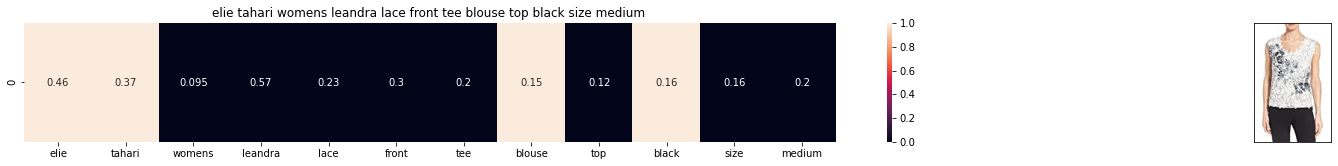

ASIN : B072HMB95W
BRAND : Elie Tahari
Eucliden distance from the given image : 1.0506076854072617


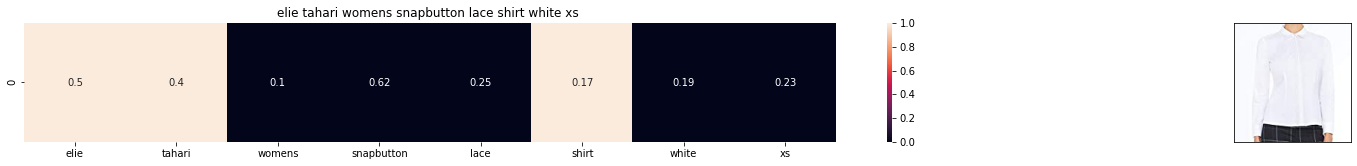

ASIN : B06X8YS632
BRAND : Elie Tahari
Eucliden distance from the given image : 1.066566411352814


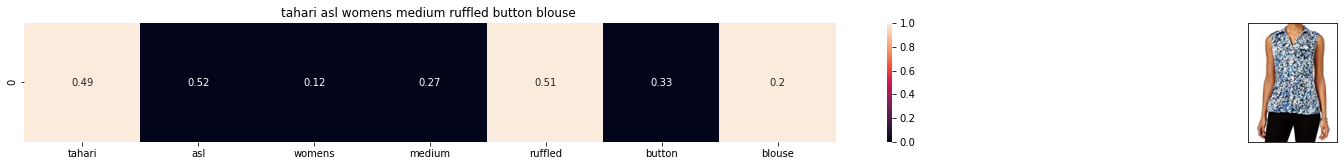

ASIN : B0727R3ZK8
BRAND : Tahari ASL
Eucliden distance from the given image : 1.0709334130469317


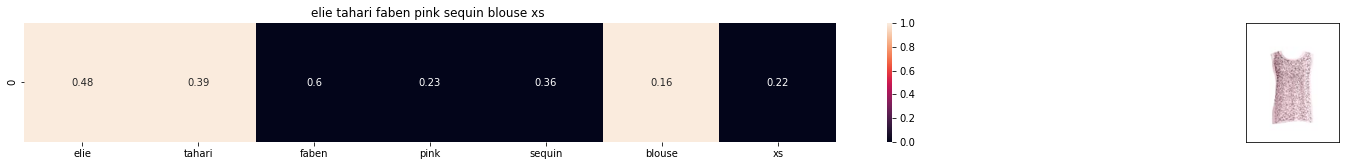

ASIN : B074VCVG5V
BRAND : Elie Tahari
Eucliden distance from the given image : 1.08545446199004


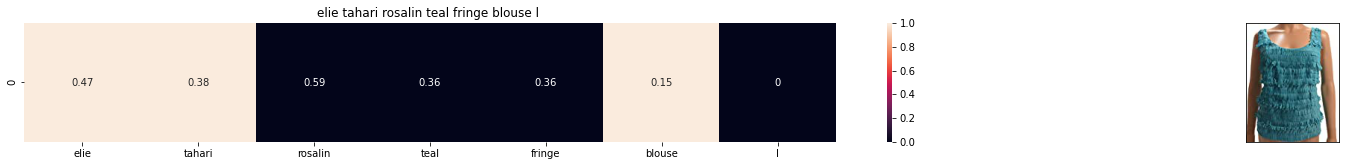

ASIN : B0751J7MJ5
BRAND : Elie Tahari
Eucliden distance from the given image : 1.092029162906729


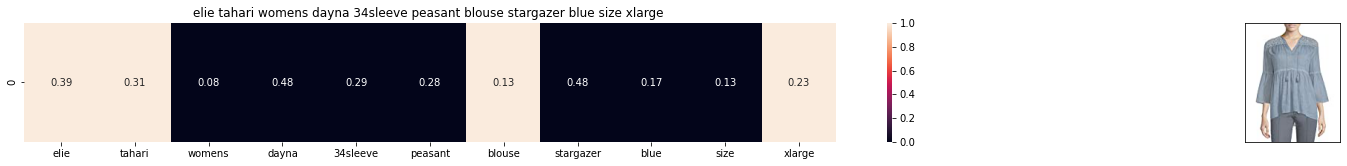

ASIN : B07258KQPD
BRAND : Elie Tahari
Eucliden distance from the given image : 1.0977009126384472


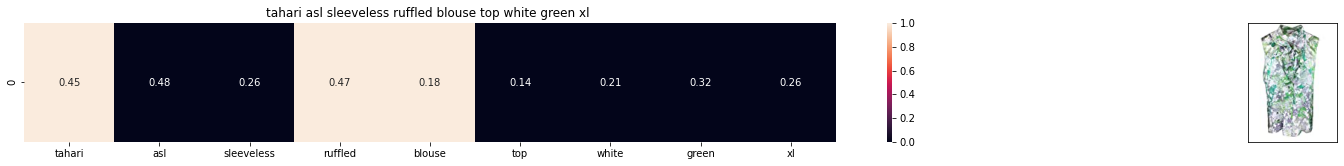

ASIN : B07196K8ZK
BRAND : Tahari ASL
Eucliden distance from the given image : 1.0978263376268496


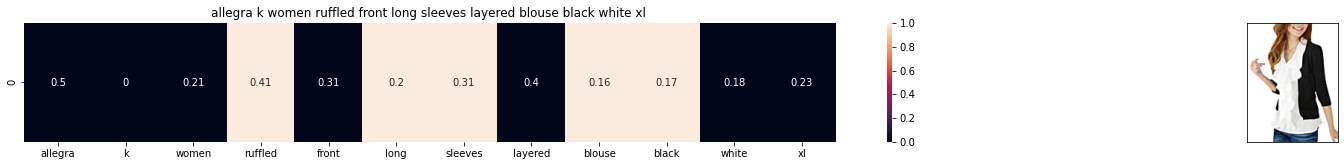

ASIN : B00E1LCYZI
BRAND : Allegra K
Eucliden distance from the given image : 1.1093679744838518


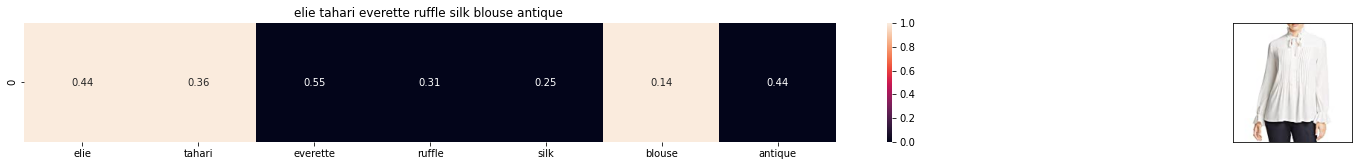

ASIN : B06XQS7B2H
BRAND : Elie Tahari
Eucliden distance from the given image : 1.1158494288000618


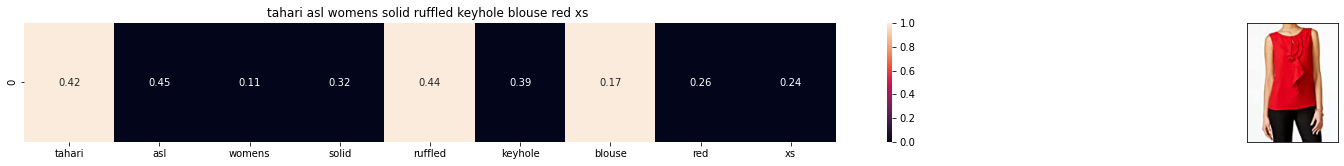

ASIN : B073DRMT4F
BRAND : Tahari ASL
Eucliden distance from the given image : 1.12308897039674


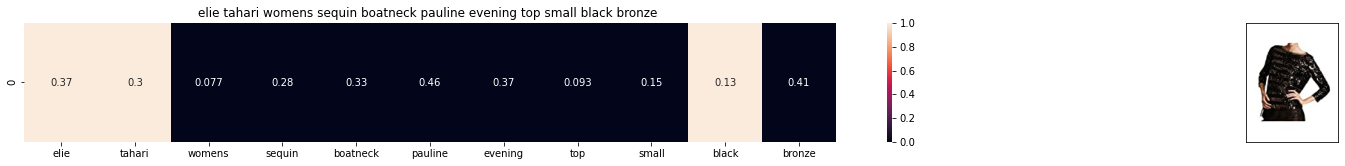

ASIN : B005E2L4XG
BRAND : Elie Tahari
Eucliden distance from the given image : 1.1459082030786756


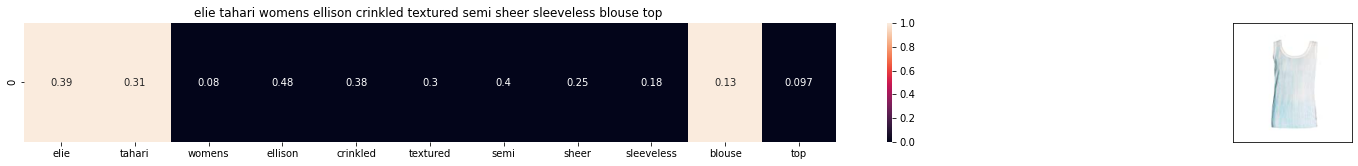

ASIN : B074VBLW5S
BRAND : Elie Tahari
Eucliden distance from the given image : 1.1581769909433588


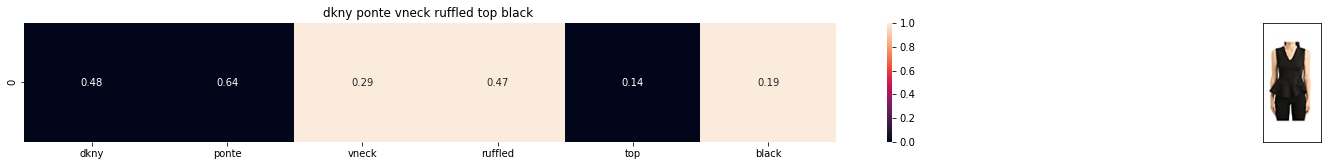

ASIN : B06XH7HQ2T
BRAND : DKNY
Eucliden distance from the given image : 1.1592903335734797


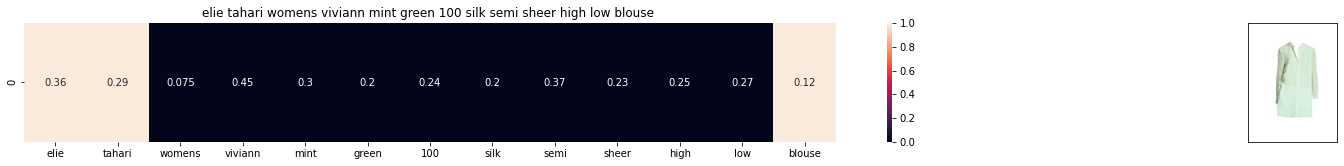

ASIN : B074VBRNX8
BRAND : Elie Tahari
Eucliden distance from the given image : 1.1758332562415978


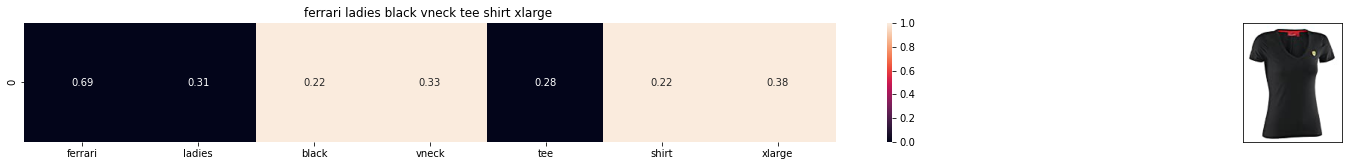

ASIN : B01EZ6XKR4
BRAND : Ferrari
Eucliden distance from the given image : 1.1773106599940453


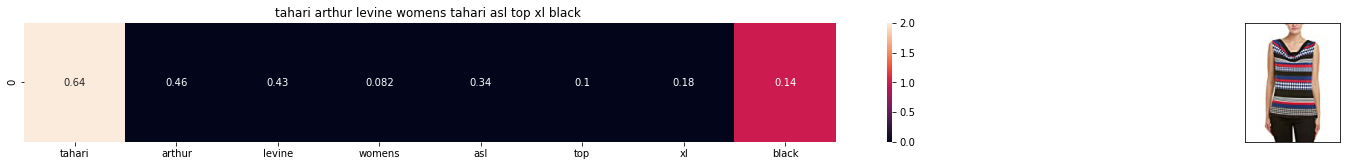

ASIN : B06X1BSY2V
BRAND : Tahari by Arthur S. Levine
Eucliden distance from the given image : 1.1849129271513121


In [66]:
def tfidf_model(doc_id, num_results):
    
    pairwise_dist = pairwise_distances(tfidf_title_features, tfidf_title_features[doc_id])
    
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    
    pdists = np.sort(pairwise_dist.flatten())[0:num_results]
    
    df_indices = list(data.index[indices])
    
    for i in range(0,len(indices)):
        # we will pass 1. doc_id, 2. title1, 3. title2, url, model
        get_result(indices[i], data['title'].loc[df_indices[0]], data['title'].loc[df_indices[i]], data['medium_image_url'].loc[df_indices[i]], 'tfidf')
        print('ASIN :',data['asin'].loc[df_indices[i]])
        print('BRAND :',data['brand'].loc[df_indices[i]])
        print ('Eucliden distance from the given image :', pdists[i])
        print('='*125)
    
tfidf_model(12566, 20)    